In [ ]:
import pandas as pd
df = pd.read_csv('/content/fraud_oracle.csv')

# Task
Perform an initial data inspection on the `df` DataFrame by examining its structure, data types, and basic statistical summaries, then visualize the distributions of its features, analyze correlations between numerical features, and summarize these insights to inform the selection of an appropriate AI model.

## Initial Data Inspection

### Subtask:
Examine the DataFrame `df` to understand its structure, data types, and basic statistical summaries.


**Reasoning**:
The subtask requires examining the DataFrame's structure, data types, and basic statistical summaries. I will use `df.info()` to get a concise summary and `df.describe()` for descriptive statistics of numerical columns.



In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


## Visualize Feature Distributions

### Subtask:
Create visualizations to understand the distribution of various features in `df`. This will include generating histograms for numerical columns and bar plots for categorical columns to show their frequencies and unique values.


**Reasoning**:
To visualize the distributions of numerical features, I will create histograms for each numerical column using `sns.histplot()`. For categorical features, I will generate bar plots using `sns.countplot()` to show their frequencies. I'll import `matplotlib.pyplot` and `seaborn` for this purpose, define appropriate lists of numerical and categorical columns, and arrange the plots in subplots for clarity.



Generating histograms for numerical features...


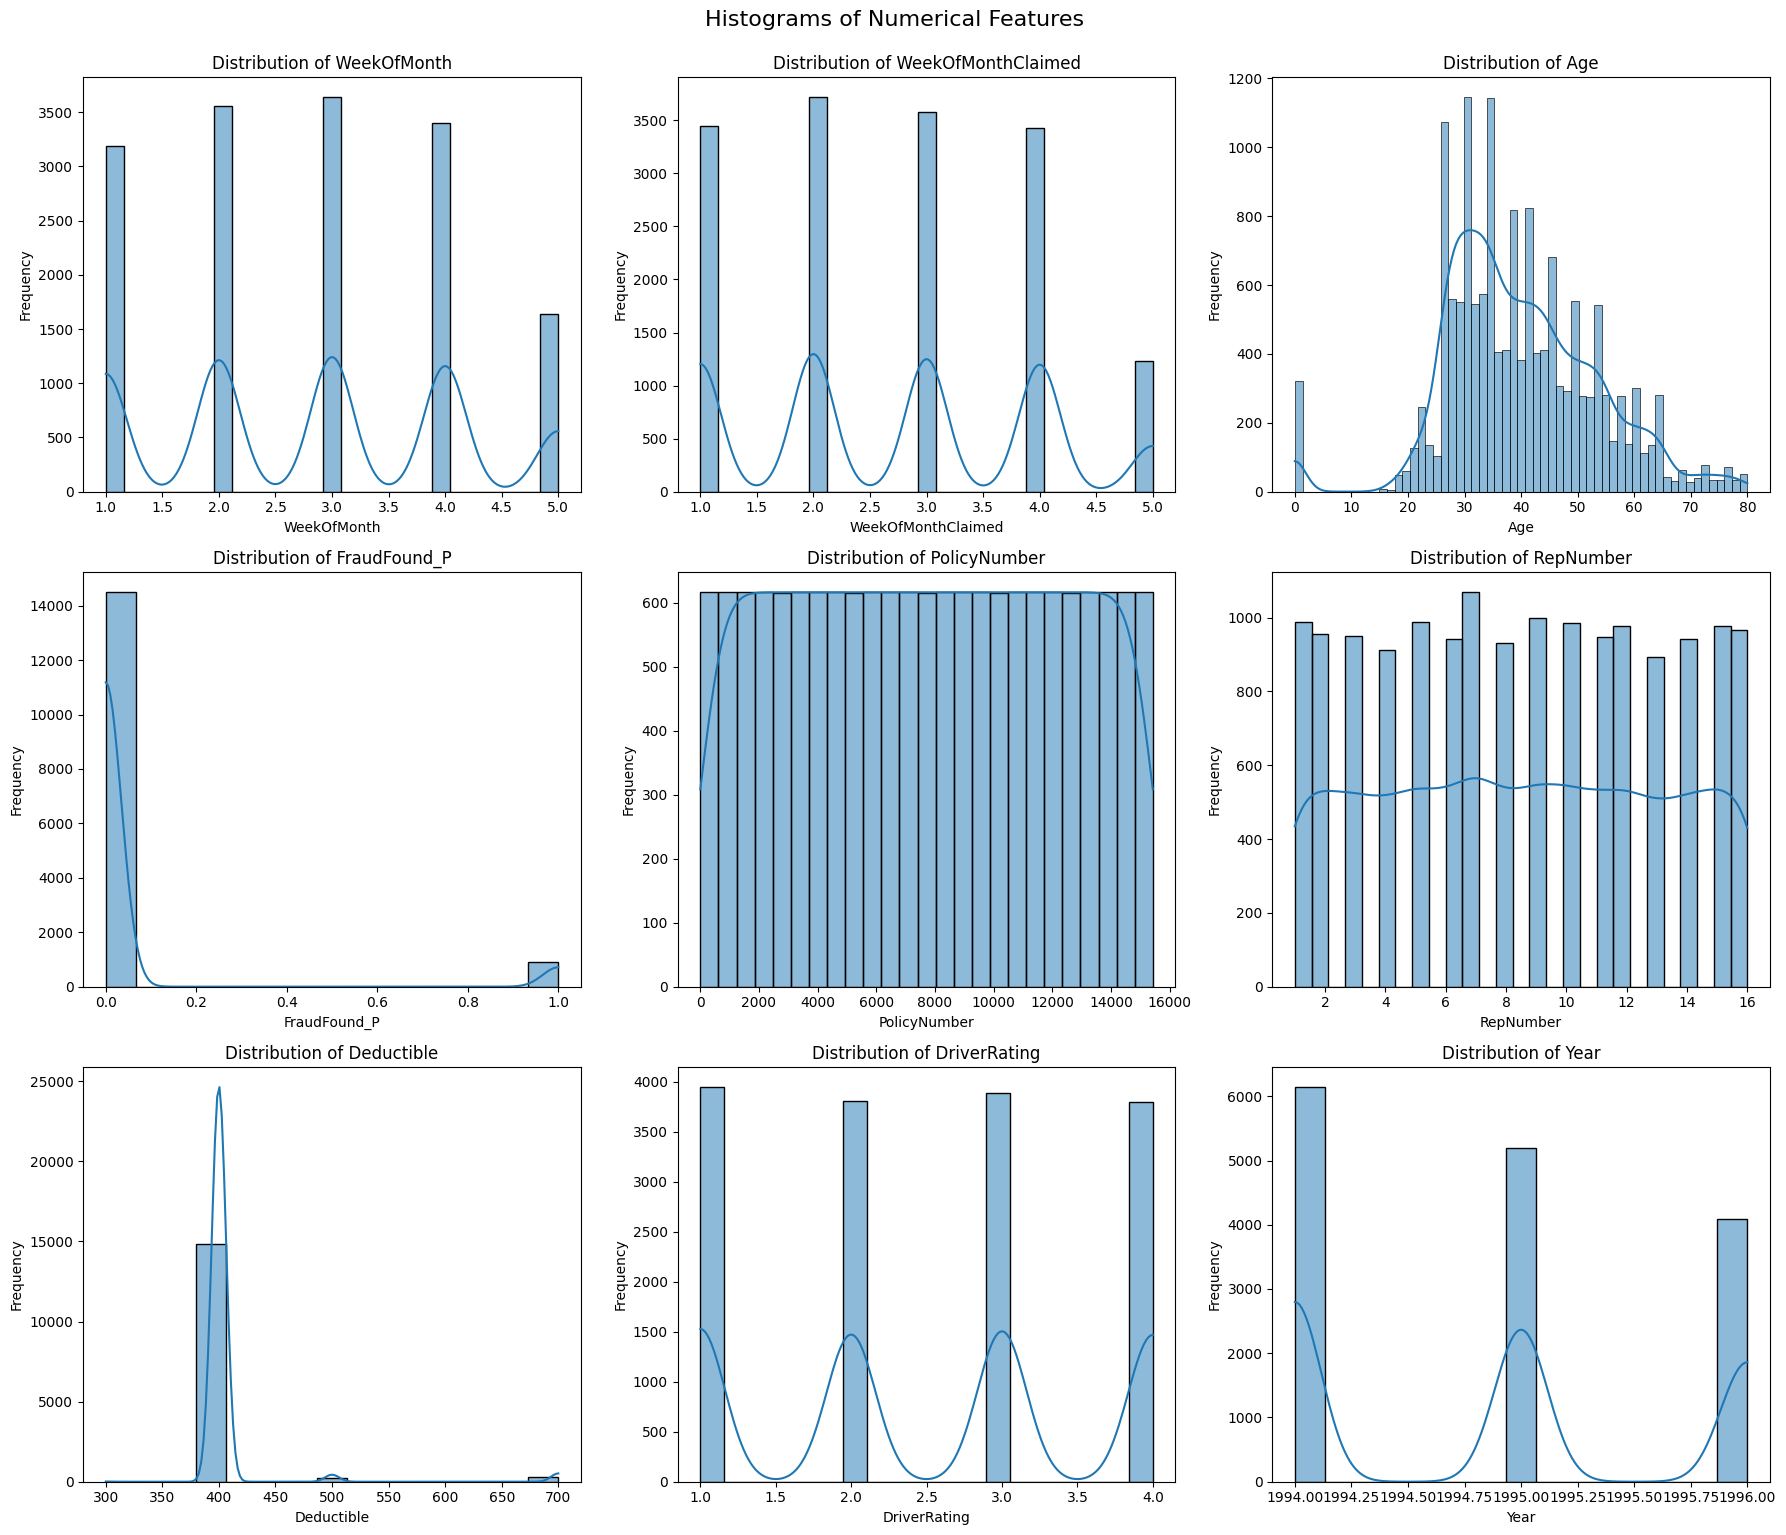


Generating bar plots for categorical features...


/tmp/ipython-input-2616353275.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes_cat[i], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2616353275.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes_cat[i], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2616353275.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], ax=axes_cat[i], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2616353275.py:47: FutureWar

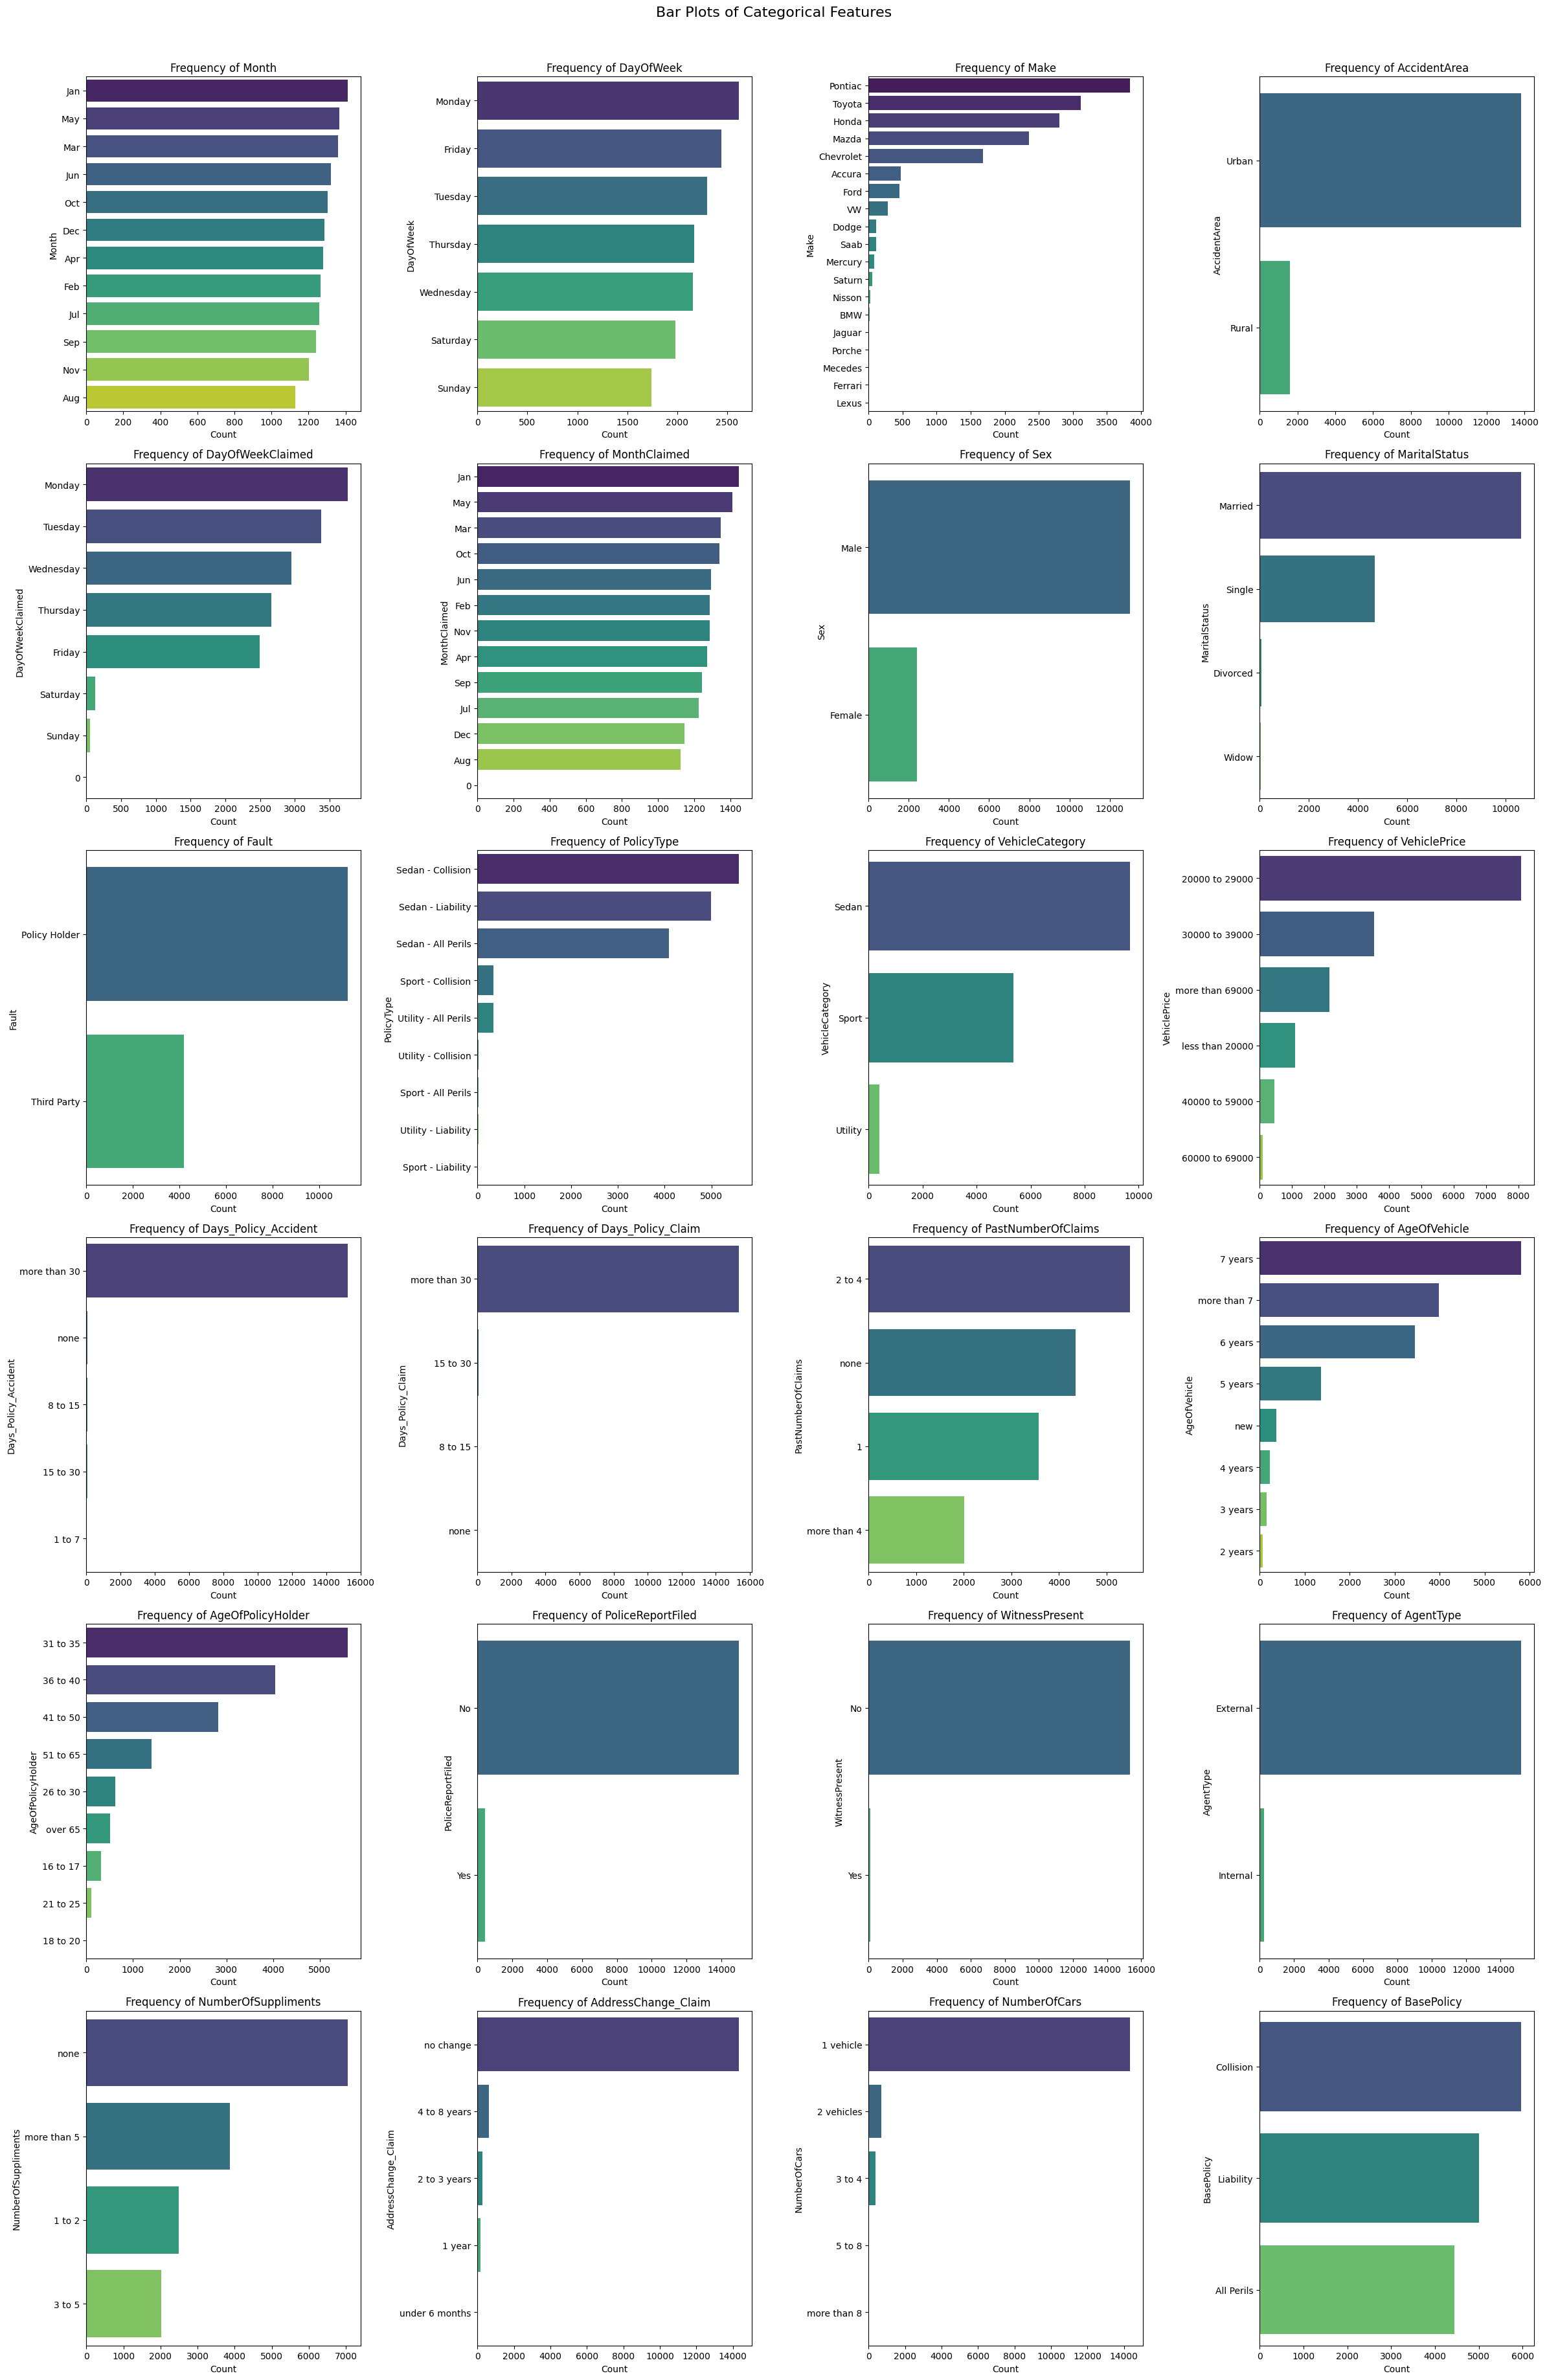

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns identified from df.info()
numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

# Create histograms for numerical columns
print("Generating histograms for numerical features...")
num_numerical_cols = len(numerical_cols)
n_rows = (num_numerical_cols + 2) // 3 # Calculate rows needed for a 3-column layout
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.show()

# List of categorical columns identified from df.info()
categorical_cols = [
    'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
    'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
    'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
    'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
    'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
    'NumberOfCars', 'BasePolicy'
]

# Create bar plots for categorical columns
print("\nGenerating bar plots for categorical features...")
num_categorical_cols = len(categorical_cols)
n_rows_cat = (num_categorical_cols + 3) // 4 # Calculate rows needed for a 4-column layout
fig_cat, axes_cat = plt.subplots(n_rows_cat, 4, figsize=(24, n_rows_cat * 6))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], ax=axes_cat[i], order=df[col].value_counts().index, palette='viridis')
    axes_cat[i].set_title(f'Frequency of {col}')
    axes_cat[i].set_xlabel('Count')
    axes_cat[i].set_ylabel(col)
    # axes_cat[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels if too crowded

# Hide any unused subplots
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.suptitle('Bar Plots of Categorical Features', y=1.02, fontsize=16)
plt.show()

**Reasoning**:
The previous code generated `FutureWarning` due to `sns.countplot` usage. To address this, I will modify the `sns.countplot` calls by explicitly setting the `hue` argument to the same column as `y` and adding `legend=False` as recommended in the warning.



Generating histograms for numerical features...


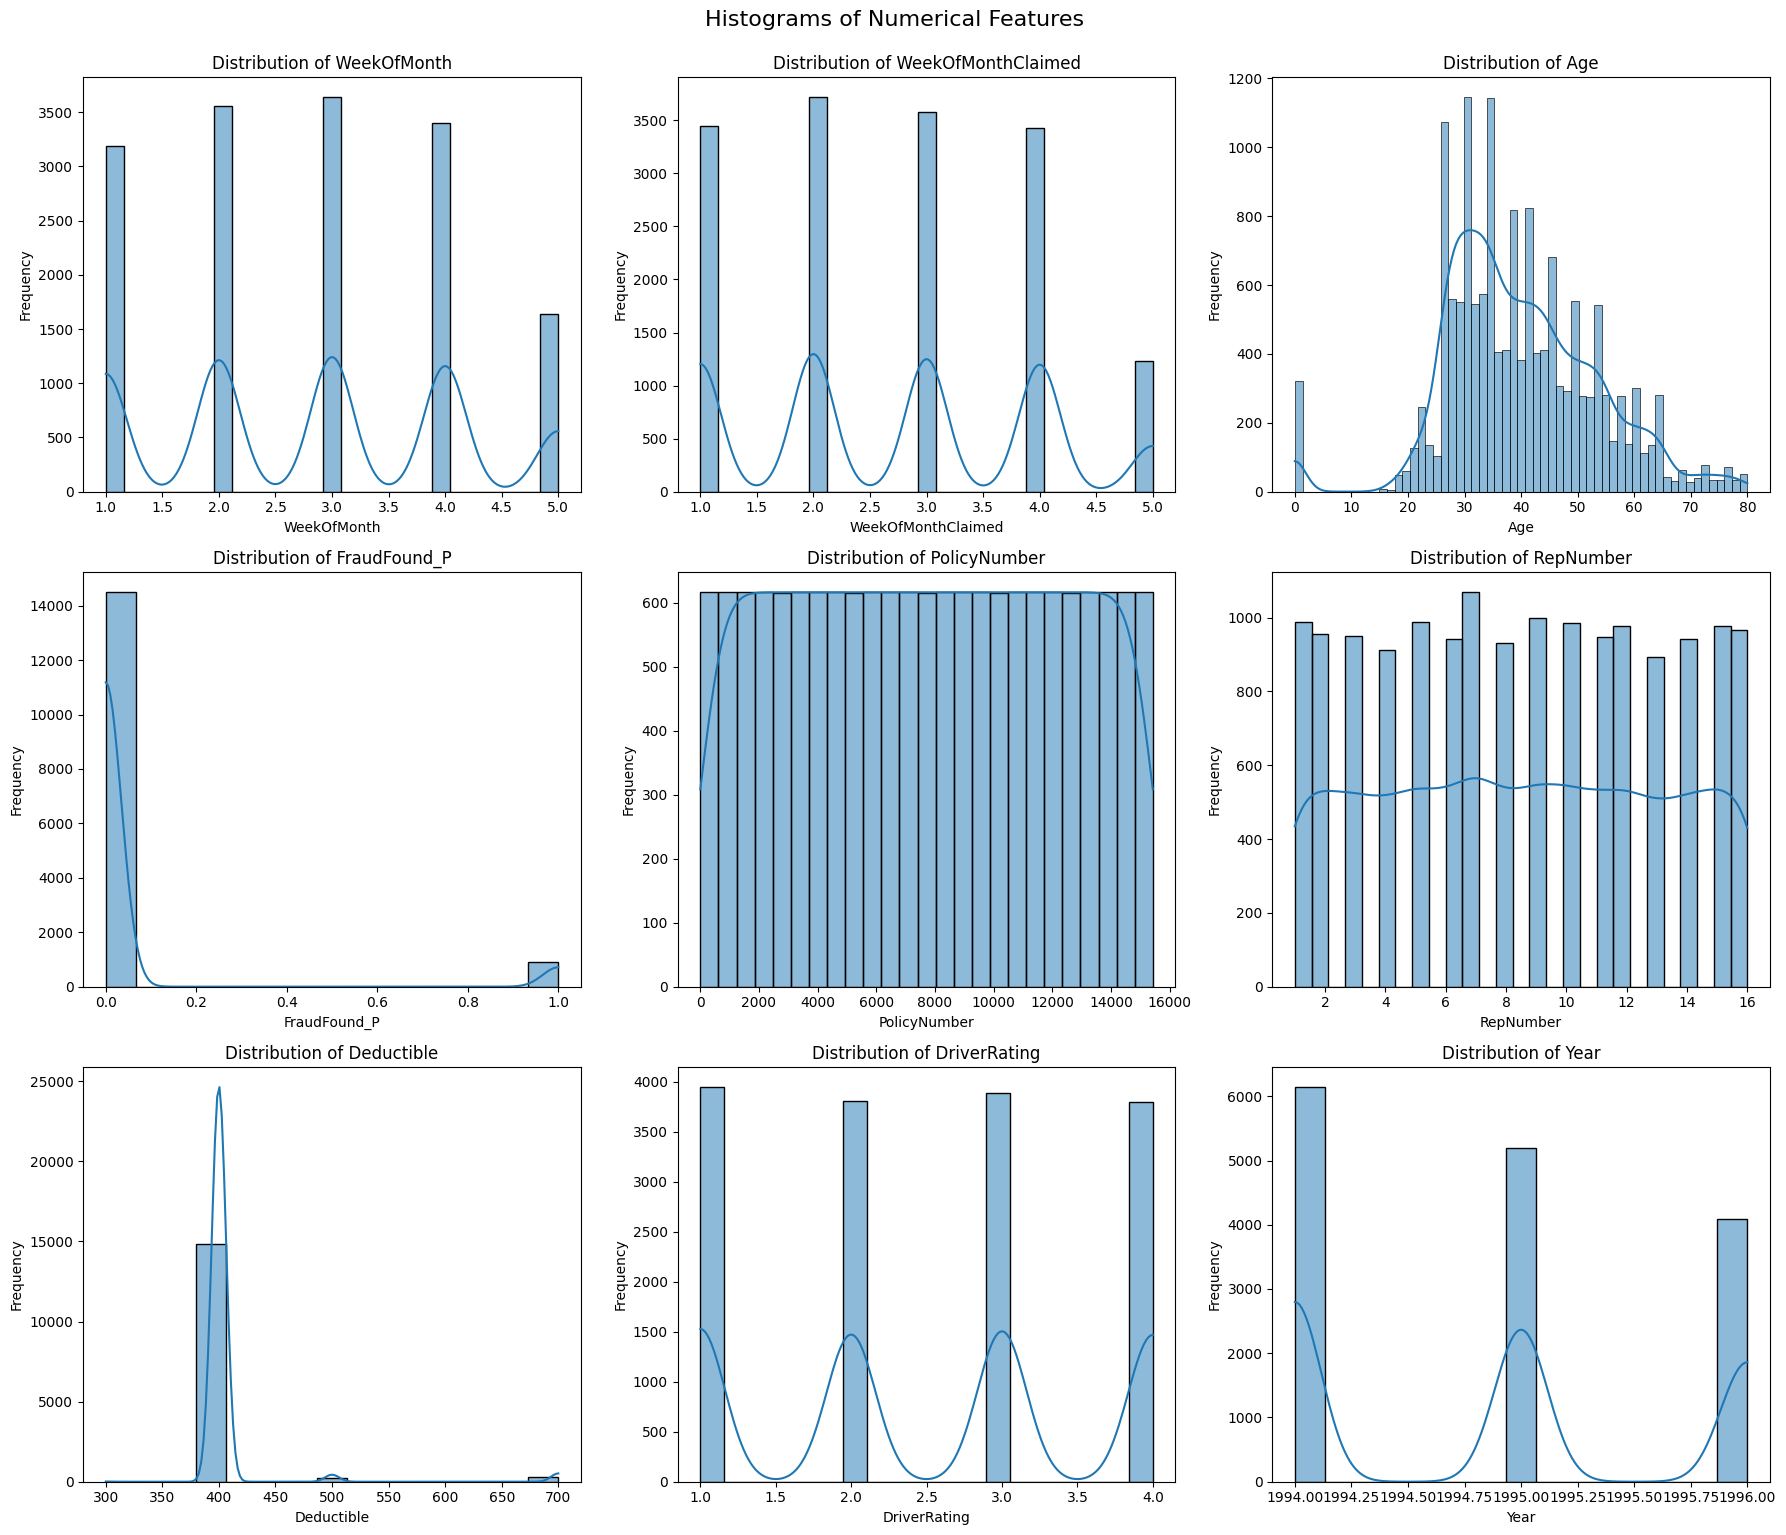


Generating bar plots for categorical features...


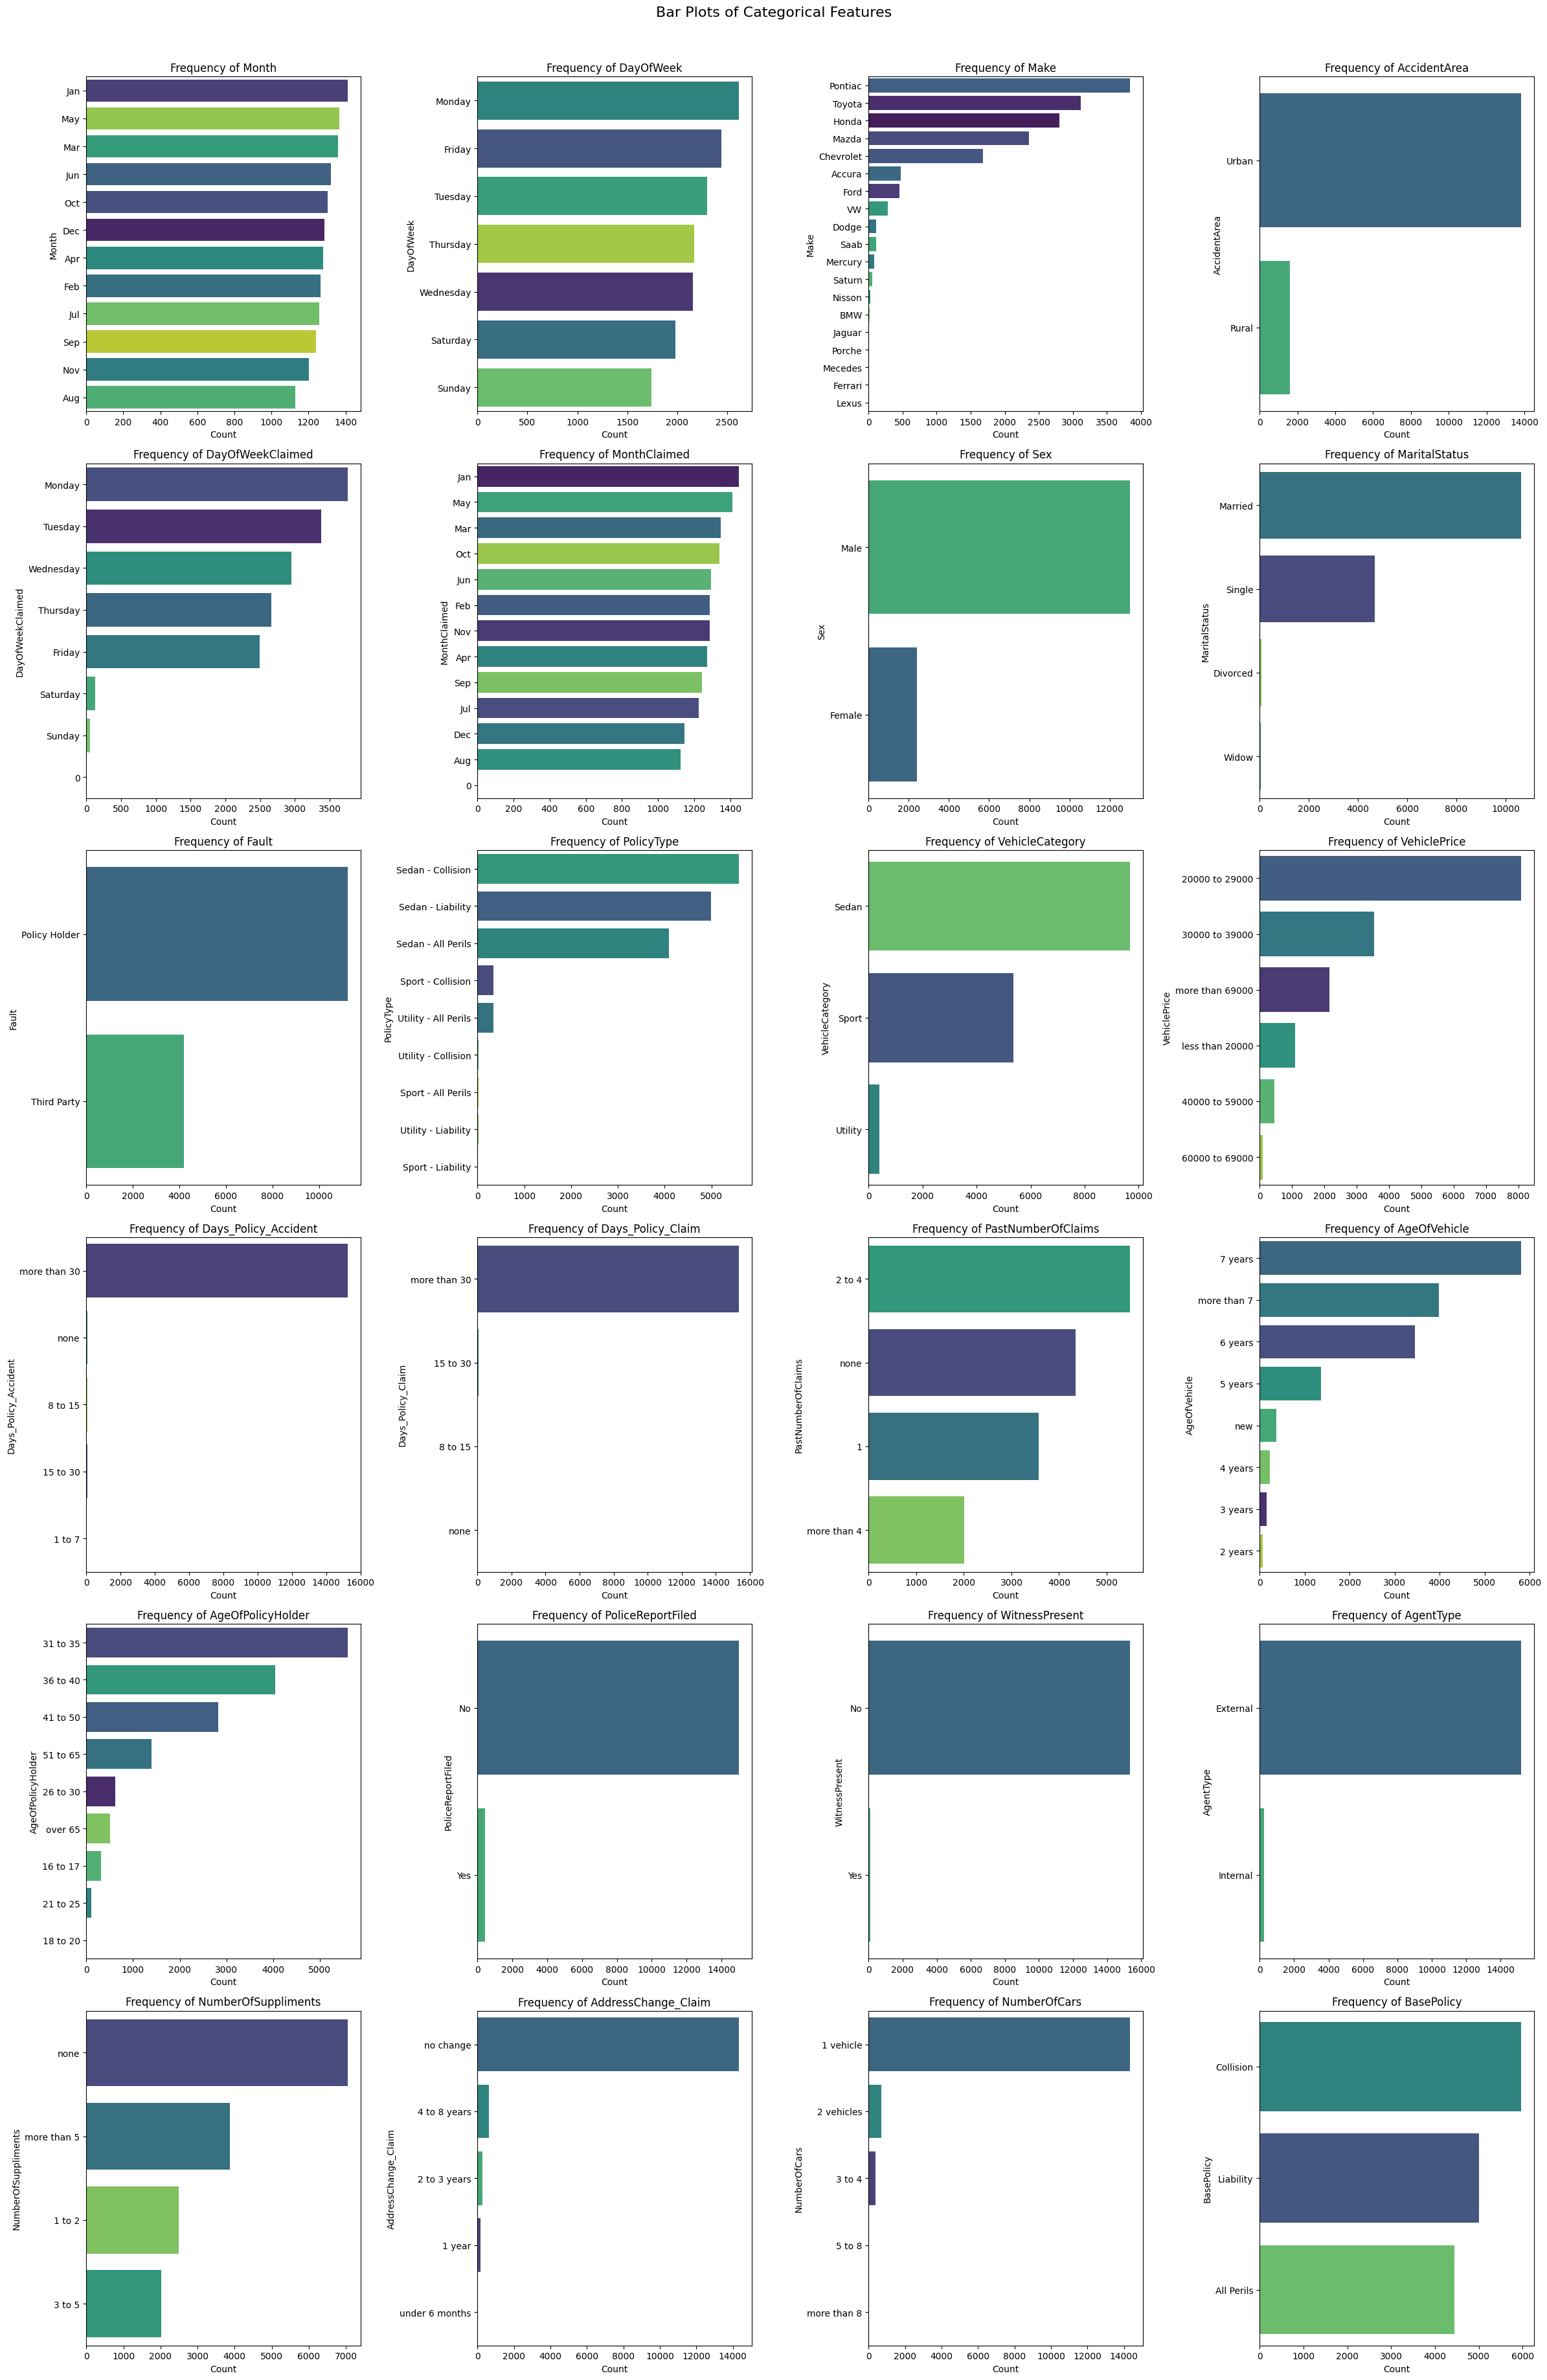

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns identified from df.info()
numerical_cols = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'PolicyNumber', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

# Create histograms for numerical columns
print("Generating histograms for numerical features...")
num_numerical_cols = len(numerical_cols)
n_rows = (num_numerical_cols + 2) // 3 # Calculate rows needed for a 3-column layout
fig, axes = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02, fontsize=16)
plt.show()

# List of categorical columns identified from df.info()
categorical_cols = [
    'Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed',
    'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType',
    'VehicleCategory', 'VehiclePrice', 'Days_Policy_Accident',
    'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
    'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent',
    'AgentType', 'NumberOfSuppliments', 'AddressChange_Claim',
    'NumberOfCars', 'BasePolicy'
]

# Create bar plots for categorical columns
print("\nGenerating bar plots for categorical features...")
num_categorical_cols = len(categorical_cols)
n_rows_cat = (num_categorical_cols + 3) // 4 # Calculate rows needed for a 4-column layout
fig_cat, axes_cat = plt.subplots(n_rows_cat, 4, figsize=(24, n_rows_cat * 6))
axes_cat = axes_cat.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=df[col], ax=axes_cat[i], order=df[col].value_counts().index, palette='viridis', hue=df[col], legend=False)
    axes_cat[i].set_title(f'Frequency of {col}')
    axes_cat[i].set_xlabel('Count')
    axes_cat[i].set_ylabel(col)
    # axes_cat[i].tick_params(axis='x', rotation=45) # Rotate x-axis labels if too crowded

# Hide any unused subplots
for j in range(i + 1, len(axes_cat)):
    fig_cat.delaxes(axes_cat[j])

plt.tight_layout()
plt.suptitle('Bar Plots of Categorical Features', y=1.02, fontsize=16)
plt.show()

## Correlation Analysis

### Subtask:
Analyze the correlations between numerical features in `df` using a correlation matrix and heatmap. Understanding feature relationships can be vital for feature selection and model choice.


**Reasoning**:
I need to analyze the correlations between numerical features. First, I'll select the relevant numerical columns, excluding 'PolicyNumber' as it's an identifier. Then, I'll compute their correlation matrix and visualize it using a heatmap with annotations and a suitable title and size for clarity.



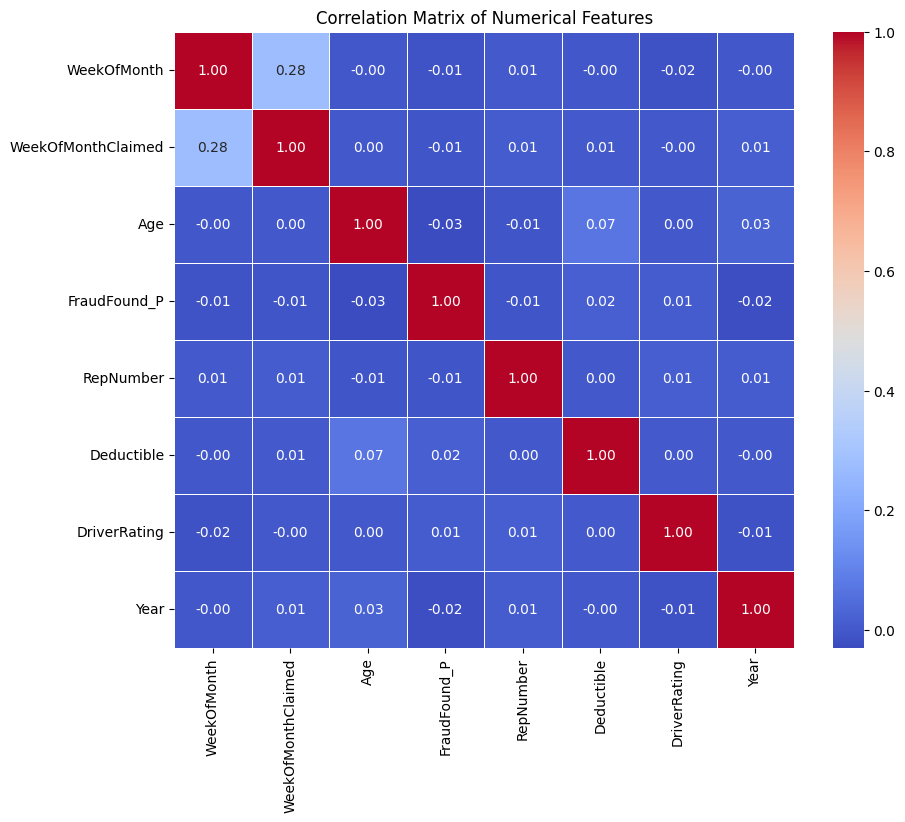

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns for correlation analysis, excluding 'PolicyNumber'
numerical_cols_for_corr = ['WeekOfMonth', 'WeekOfMonthClaimed', 'Age', 'FraudFound_P', 'RepNumber', 'Deductible', 'DriverRating', 'Year']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols_for_corr].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Final Task

### Subtask:
Summarize the findings from the data inspection and visualizations, and discuss how these insights can inform the selection of an appropriate AI model for your specific task.


## Summary:

### Q&A

The insights gathered from the data inspection, feature visualizations, and correlation analysis can inform the selection of an appropriate AI model by highlighting data characteristics and necessary preprocessing steps.

### Data Analysis Key Findings

*   **Data Structure and Quality:**
    *   The dataset contains 15420 entries and 33 columns with no missing values.
    *   Initially, 24 columns are of `object` type, with 9 as `int64`. Several `object` columns, such as `VehiclePrice`, `Days_Policy_Accident`, `Days_Policy_Claim`, `PastNumberOfClaims`, `AgeOfVehicle`, `AgeOfPolicyHolder`, `NumberOfSuppliments`, `AddressChange_Claim`, and `NumberOfCars`, appear to represent numerical or temporal data, indicating a need for type conversion.
    *   The target variable `FraudFound_P` is binary (0 or 1), with approximately 5.9% (mean of 0.059) of entries classified as fraudulent, indicating a class imbalance.
    *   The `Age` column has a minimum value of 0, suggesting potential data entry errors or placeholder values.
*   **Feature Distributions:**
    *   **Numerical Features:** Histograms revealed varying distributions. For instance, `Age` distribution is somewhat bell-shaped, while `Deductible` shows distinct peaks. `FraudFound_P` is highly imbalanced. `Year` shows data from 1994-1996.
    *   **Categorical Features:** Bar plots showed the frequency of unique values. Many categorical features exhibit skewed distributions with one or a few categories being dominant (e.g., `Month`, `DayOfWeek`, `Sex`, `AgentType`). Some columns like `VehiclePrice`, `Days_Policy_Accident`, `Days_Policy_Claim`, `PastNumberOfClaims`, `AgeOfVehicle`, `AgeOfPolicyHolder`, `NumberOfSuppliments`, `AddressChange_Claim`, and `NumberOfCars` also behave like categorical features due to their limited unique string values or ordinal nature, reinforcing the need for conversion or encoding.
*   **Correlations:**
    *   The correlation matrix between numerical features showed relatively weak linear relationships among most pairs.
    *   `FraudFound_P` showed very weak correlations with other numerical features, indicating that linear correlations with these specific numerical features alone might not be strong predictors for fraud.

### Insights or Next Steps

*   **Data Preprocessing Priority:** The significant number of `object` type columns that represent numerical or ordinal data (e.g., `VehiclePrice`, `AgeOfVehicle`, `Days_Policy_Accident`) must be converted to appropriate numerical types before they can be used effectively in most AI models. Categorical `object` columns will require encoding (e.g., One-Hot Encoding, Label Encoding).
*   **Model Selection Considerations:** Given the binary and imbalanced nature of the target variable (`FraudFound_P`), classification models are required. Techniques for handling imbalanced datasets (e.g., SMOTE, undersampling, cost-sensitive learning) should be considered during model training. The weak linear correlations suggest that models capable of capturing non-linear relationships (e.g., tree-based models like Random Forest, Gradient Boosting, or neural networks) might perform better than linear models.


# Task
Convert ordinal categorical columns `VehiclePrice`, `Days_Policy_Accident`, `Days_Policy_Claim`, `PastNumberOfClaims`, `AgeOfVehicle`, `AgeOfPolicyHolder`, `NumberOfSuppliments`, `AddressChange_Claim`, and `NumberOfCars` to numerical equivalents based on their natural ordering.

## Convert Ordinal Categorical Columns to Numerical

### Subtask:
Convert specific 'object' type columns that represent ordinal or numerical data (such as 'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder', 'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars') into appropriate numerical or ordered categorical types by defining a mapping for their string values to numerical equivalents.


**Reasoning**:
The subtask requires converting several ordinal categorical columns to numerical representations. I will define a mapping dictionary for each specified column and use the `.replace()` method to convert the string values to numerical equivalents, ensuring that all mentioned columns are processed as instructed.



In [ ]:
import pandas as pd

# 1. Map VehiclePrice
vehicle_price_mapping = {
    'less than 10000': 5000,
    '10000 to 19000': 15000,
    '20000 to 29000': 25000,
    '30000 to 39000': 35000,
    'more than 39000': 45000
}
df['VehiclePrice'] = df['VehiclePrice'].replace(vehicle_price_mapping)

# 2. Map Days_Policy_Accident
days_policy_accident_mapping = {
    'none': 0,
    '1 to 7': 4,
    '8 to 15': 11,
    '15 to 30': 22,
    'more than 30': 45
}
df['Days_Policy_Accident'] = df['Days_Policy_Accident'].replace(days_policy_accident_mapping)

# 3. Map Days_Policy_Claim
days_policy_claim_mapping = {
    'none': 0,
    '8 to 15': 11,
    '15 to 30': 22,
    'more than 30': 45
}
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].replace(days_policy_claim_mapping)

# 4. Map PastNumberOfClaims
past_claims_mapping = {
    'none': 0,
    '1': 1,
    '2 to 4': 3,
    'more than 4': 5
}
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace(past_claims_mapping)

# 5. Map AgeOfVehicle
age_of_vehicle_mapping = {
    'new': 0,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8
}
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace(age_of_vehicle_mapping)

# 6. Map AgeOfPolicyHolder
age_of_policyholder_mapping = {
    '16 to 17': 16,
    '18 to 20': 19,
    '21 to 25': 23,
    '26 to 30': 28,
    '31 to 35': 33,
    '36 to 40': 38,
    '41 to 50': 45,
    '51 to 65': 58,
    'more than 65': 70
}
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace(age_of_policyholder_mapping)

# 7. Map NumberOfSuppliments
num_suppliments_mapping = {
    'none': 0,
    '1 to 2': 1,
    '3 to 5': 4,
    'more than 5': 6
}
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace(num_suppliments_mapping)

# 8. Map AddressChange_Claim
address_change_mapping = {
    'no change': 0,
    '1 year': 1,
    '2 to 3 years': 2,
    '4 to 8 years': 6,
    'more than 8 years': 9
}
df['AddressChange_Claim'] = df['AddressChange_Claim'].replace(address_change_mapping)

# 9. Map NumberOfCars
num_cars_mapping = {
    '1 vehicle': 1,
    '2 vehicles': 2,
    '3 to 4': 3,
    '5 to 8': 6,
    'more than 8': 9
}
df['NumberOfCars'] = df['NumberOfCars'].replace(num_cars_mapping)

print("Ordinal categorical columns converted to numerical types.")
print("Updated DataFrame info:")
df.info()

Ordinal categorical columns converted to numerical types.
Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  Vehi

/tmp/ipython-input-4217987485.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Days_Policy_Accident'] = df['Days_Policy_Accident'].replace(days_policy_accident_mapping)
/tmp/ipython-input-4217987485.py:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Days_Policy_Claim'] = df['Days_Policy_Claim'].replace(days_policy_claim_mapping)
/tmp/ipython-input-4217987485.py:39: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `resul

**Reasoning**:
The previous step's `df.info()` output indicates that `VehiclePrice`, `AgeOfPolicyHolder`, and `AddressChange_Claim` columns are still of `object` dtype, despite an attempt to convert them using `.replace()`. This suggests that some unique values in these columns might not have been present in the mapping dictionaries. I will inspect the unique values of these columns to identify any missing entries in the mappings.



In [ ]:
print("Unique values in 'VehiclePrice':", df['VehiclePrice'].unique())
print("Unique values in 'AgeOfPolicyHolder':", df['AgeOfPolicyHolder'].unique())
print("Unique values in 'AddressChange_Claim':", df['AddressChange_Claim'].unique())

Unique values in 'VehiclePrice': ['more than 69000' 25000 35000 'less than 20000' '40000 to 59000'
 '60000 to 69000']
Unique values in 'AgeOfPolicyHolder': [28 33 45 58 23 38 16 'over 65' 19]
Unique values in 'AddressChange_Claim': [1 0 6 2 'under 6 months']


**Reasoning**:
The previous inspection revealed that some string values in 'VehiclePrice', 'AgeOfPolicyHolder', and 'AddressChange_Claim' columns were not covered by the initial mappings, leaving them as 'object' dtype. I will refine the mappings for these columns to include all observed string values and then re-apply the conversions for all specified ordinal columns. After conversion, I will explicitly cast these columns to numeric types to ensure correct data types.



In [ ]:
import pandas as pd

# 1. Map VehiclePrice - Updated to include all observed unique string values
vehicle_price_mapping = {
    'less than 10000': 5000,
    '10000 to 19000': 15000,
    '20000 to 29000': 25000,
    '30000 to 39000': 35000,
    'more than 39000': 45000,
    'less than 20000': 10000, # Added based on unique values found
    '40000 to 59000': 50000, # Added based on unique values found
    '60000 to 69000': 65000, # Added based on unique values found
    'more than 69000': 70000  # Added based on unique values found
}
df['VehiclePrice'] = df['VehiclePrice'].replace(vehicle_price_mapping).astype(int)

# 2. Map Days_Policy_Accident
days_policy_accident_mapping = {
    'none': 0,
    '1 to 7': 4,
    '8 to 15': 11,
    '15 to 30': 22,
    'more than 30': 45
}
df['Days_Policy_Accident'] = df['Days_Policy_Accident'].replace(days_policy_accident_mapping).astype(int)

# 3. Map Days_Policy_Claim
days_policy_claim_mapping = {
    'none': 0,
    '8 to 15': 11,
    '15 to 30': 22,
    'more than 30': 45
}
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].replace(days_policy_claim_mapping).astype(int)

# 4. Map PastNumberOfClaims
past_claims_mapping = {
    'none': 0,
    '1': 1,
    '2 to 4': 3,
    'more than 4': 5
}
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace(past_claims_mapping).astype(int)

# 5. Map AgeOfVehicle
age_of_vehicle_mapping = {
    'new': 0,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8
}
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace(age_of_vehicle_mapping).astype(int)

# 6. Map AgeOfPolicyHolder - Updated to include 'over 65'
age_of_policyholder_mapping = {
    '16 to 17': 16,
    '18 to 20': 19,
    '21 to 25': 23,
    '26 to 30': 28,
    '31 to 35': 33,
    '36 to 40': 38,
    '41 to 50': 45,
    '51 to 65': 58,
    'more than 65': 70,
    'over 65': 70 # Added based on unique values found
}
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace(age_of_policyholder_mapping).astype(int)

# 7. Map NumberOfSuppliments
num_suppliments_mapping = {
    'none': 0,
    '1 to 2': 1,
    '3 to 5': 4,
    'more than 5': 6
}
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace(num_suppliments_mapping).astype(int)

# 8. Map AddressChange_Claim - Updated to include 'under 6 months'
address_change_mapping = {
    'no change': 0,
    '1 year': 1,
    '2 to 3 years': 2,
    '4 to 8 years': 6,
    'more than 8 years': 9,
    'under 6 months': 0 # Added based on unique values found
}
df['AddressChange_Claim'] = df['AddressChange_Claim'].replace(address_change_mapping).astype(int)

# 9. Map NumberOfCars
num_cars_mapping = {
    '1 vehicle': 1,
    '2 vehicles': 2,
    '3 to 4': 3,
    '5 to 8': 6,
    'more than 8': 9
}
df['NumberOfCars'] = df['NumberOfCars'].replace(num_cars_mapping).astype(int)

print("Ordinal categorical columns converted to numerical types and cast to int.")
print("Updated DataFrame info:")
df.info()

Ordinal categorical columns converted to numerical types and cast to int.
Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  

/tmp/ipython-input-1537453264.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['VehiclePrice'] = df['VehiclePrice'].replace(vehicle_price_mapping).astype(int)
/tmp/ipython-input-1537453264.py:71: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace(age_of_policyholder_mapping).astype(int)
/tmp/ipython-input-1537453264.py:91: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `re

**Reasoning**:
The previous step successfully converted the target columns to integer types, as confirmed by the `df.info()` output. The `FutureWarning` messages indicate a deprecation notice regarding pandas' implicit downcasting behavior within the `replace` method. To address these warnings and explicitly opt into the future behavior, I will set `pd.set_option('future.no_silent_downcasting', True)` before performing the replacements. This ensures compliance with future pandas versions and suppresses the warnings without altering the correct type conversion already achieved by `.astype(int)`.



In [ ]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)

# 1. Map VehiclePrice - Updated to include all observed unique string values
vehicle_price_mapping = {
    'less than 10000': 5000,
    '10000 to 19000': 15000,
    '20000 to 29000': 25000,
    '30000 to 39000': 35000,
    'more than 39000': 45000,
    'less than 20000': 10000, # Added based on unique values found
    '40000 to 59000': 50000, # Added based on unique values found
    '60000 to 69000': 65000, # Added based on unique values found
    'more than 69000': 70000  # Added based on unique values found
}
df['VehiclePrice'] = df['VehiclePrice'].replace(vehicle_price_mapping).astype(int)

# 2. Map Days_Policy_Accident
days_policy_accident_mapping = {
    'none': 0,
    '1 to 7': 4,
    '8 to 15': 11,
    '15 to 30': 22,
    'more than 30': 45
}
df['Days_Policy_Accident'] = df['Days_Policy_Accident'].replace(days_policy_accident_mapping).astype(int)

# 3. Map Days_Policy_Claim
days_policy_claim_mapping = {
    'none': 0,
    '8 to 15': 11,
    '15 to 30': 22,
    'more than 30': 45
}
df['Days_Policy_Claim'] = df['Days_Policy_Claim'].replace(days_policy_claim_mapping).astype(int)

# 4. Map PastNumberOfClaims
past_claims_mapping = {
    'none': 0,
    '1': 1,
    '2 to 4': 3,
    'more than 4': 5
}
df['PastNumberOfClaims'] = df['PastNumberOfClaims'].replace(past_claims_mapping).astype(int)

# 5. Map AgeOfVehicle
age_of_vehicle_mapping = {
    'new': 0,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    'more than 7': 8
}
df['AgeOfVehicle'] = df['AgeOfVehicle'].replace(age_of_vehicle_mapping).astype(int)

# 6. Map AgeOfPolicyHolder - Updated to include 'over 65'
age_of_policyholder_mapping = {
    '16 to 17': 16,
    '18 to 20': 19,
    '21 to 25': 23,
    '26 to 30': 28,
    '31 to 35': 33,
    '36 to 40': 38,
    '41 to 50': 45,
    '51 to 65': 58,
    'more than 65': 70,
    'over 65': 70 # Added based on unique values found
}
df['AgeOfPolicyHolder'] = df['AgeOfPolicyHolder'].replace(age_of_policyholder_mapping).astype(int)

# 7. Map NumberOfSuppliments
num_suppliments_mapping = {
    'none': 0,
    '1 to 2': 1,
    '3 to 5': 4,
    'more than 5': 6
}
df['NumberOfSuppliments'] = df['NumberOfSuppliments'].replace(num_suppliments_mapping).astype(int)

# 8. Map AddressChange_Claim - Updated to include 'under 6 months'
address_change_mapping = {
    'no change': 0,
    '1 year': 1,
    '2 to 3 years': 2,
    '4 to 8 years': 6,
    'more than 8 years': 9,
    'under 6 months': 0 # Added based on unique values found
}
df['AddressChange_Claim'] = df['AddressChange_Claim'].replace(address_change_mapping).astype(int)

# 9. Map NumberOfCars
num_cars_mapping = {
    '1 vehicle': 1,
    '2 vehicles': 2,
    '3 to 4': 3,
    '5 to 8': 6,
    'more than 8': 9
}
df['NumberOfCars'] = df['NumberOfCars'].replace(num_cars_mapping).astype(int)

print("Ordinal categorical columns converted to numerical types and cast to int.")
print("Updated DataFrame info:")
df.info()

Ordinal categorical columns converted to numerical types and cast to int.
Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  

## Handle Age Outliers

### Subtask:
Address the 'Age' column's minimum value of 0, which suggests potential data entry errors or placeholder values. Replace these 0 values with a more appropriate measure, such as the median age, to ensure data quality.


**Reasoning**:
I need to address the 'Age' column's minimum value of 0. I will calculate the median age, excluding the 0 values, and then replace all 0s in the 'Age' column with this calculated median to clean the data. Finally, I will display the updated minimum age and the first few rows to verify the change.



In [ ]:
import numpy as np

# 1. Calculate the median of the 'Age' column, excluding 0 values
median_age = df[df['Age'] != 0]['Age'].median()

print(f"Median age (excluding 0s): {median_age}")

# 2. Replace all occurrences of 0 in the 'Age' column with the median_age
df['Age'] = df['Age'].replace(0, median_age)

# 3. Display the updated minimum value and the first few rows of the 'Age' column
print(f"Updated minimum age in 'Age' column: {df['Age'].min()}")
print("First few rows of 'Age' column after replacement:")
print(df['Age'].head())

Median age (excluding 0s): 39.0
Updated minimum age in 'Age' column: 16
First few rows of 'Age' column after replacement:
0    21
1    34
2    47
3    65
4    27
Name: Age, dtype: int64


## One-Hot Encode Nominal Categorical Columns

### Subtask:
Identify all remaining 'object' type columns (nominal categorical features) and apply One-Hot Encoding to convert them into a numerical format suitable for machine learning models. This will create new binary columns for each category.


**Reasoning**:
I need to identify the remaining 'object' type columns to prepare for one-hot encoding. Using `df.select_dtypes(include='object').columns` will give me a list of these column names.



In [ ]:
remaining_object_cols = df.select_dtypes(include='object').columns
print(f"Remaining object columns to be one-hot encoded: {list(remaining_object_cols)}")

Remaining object columns to be one-hot encoded: ['Month', 'DayOfWeek', 'Make', 'AccidentArea', 'DayOfWeekClaimed', 'MonthClaimed', 'Sex', 'MaritalStatus', 'Fault', 'PolicyType', 'VehicleCategory', 'PoliceReportFiled', 'WitnessPresent', 'AgentType', 'BasePolicy']


**Reasoning**:
I need to apply one-hot encoding to the identified nominal categorical features using `pd.get_dummies()` and then update the DataFrame, ensuring the original columns are dropped and the new dummy variables are added.



In [ ]:
import pandas as pd

# Perform one-hot encoding on the identified object columns
df = pd.get_dummies(df, columns=remaining_object_cols, drop_first=False)

print("One-hot encoding applied to nominal categorical columns.")
print("Updated DataFrame info:")
df.info()

One-hot encoding applied to nominal categorical columns.
Updated DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Columns: 108 entries, WeekOfMonth to BasePolicy_Liability
dtypes: bool(90), int64(18)
memory usage: 3.4 MB


## Check Preprocessed Data

### Subtask:
Display the information and the first few rows of the DataFrame after all preprocessing steps to verify that data types have been correctly converted and categorical features have been encoded.


**Reasoning**:
To verify the preprocessing steps, I need to display the DataFrame's information using `df.info()` to check data types and non-null counts, and then display the first few rows using `df.head()` to visually inspect the data.



In [ ]:
print("DataFrame Info after preprocessing:")
df.info()

print("\nFirst 5 rows of DataFrame after preprocessing:")
df.head()

DataFrame Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Columns: 108 entries, WeekOfMonth to BasePolicy_Liability
dtypes: bool(90), int64(18)
memory usage: 3.4 MB

First 5 rows of DataFrame after preprocessing:


,WeekOfMonth,WeekOfMonthClaimed,Age,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,...,VehicleCategory_Utility,PoliceReportFiled_No,PoliceReportFiled_Yes,WitnessPresent_No,WitnessPresent_Yes,AgentType_External,AgentType_Internal,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,5,1,21,70000,0,1,12,300,1,45,...,False,True,False,True,False,True,False,False,False,True
1,3,4,34,70000,0,2,15,400,4,45,...,False,False,True,True,False,True,False,False,True,False
2,5,2,47,70000,0,3,7,400,3,45,...,False,True,False,True,False,True,False,False,True,False
3,2,1,65,25000,0,4,4,400,2,45,...,False,False,True,True,False,True,False,False,False,True
4,5,2,27,70000,0,5,3,400,1,45,...,False,True,False,True,False,True,False,False,True,False


## Handle Imbalanced Data

### Subtask:
Address the class imbalance in the target variable 'FraudFound_P' using techniques like SMOTE. This step will be performed after all features are in a numerical format and separated into features (X) and target (y).


**Reasoning**:
First, I will separate the features (X) and the target variable (y) from the DataFrame `df`. The target variable is 'FraudFound_P', and all other columns are features. Then I will print the shapes of X and y.



In [ ]:
X = df.drop('FraudFound_P', axis=1)
y = df['FraudFound_P']

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (15420, 107)
Shape of target (y): (15420,)


**Reasoning**:
To address the class imbalance, I will import SMOTE, instantiate it with a random state, apply it to the features (X) and target (y) to create resampled sets, and then print the shapes and value counts of both original and resampled data to confirm the balancing.



In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with a random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the original features and target
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print shapes to compare original and resampled datasets
print("Original dataset shapes:")
print(f"X: {X.shape}, y: {y.shape}")
print("Resampled dataset shapes:")
print(f"X_resampled: {X_resampled.shape}, y_resampled: {y_resampled.shape}")

# Print value counts to confirm balancing
print("\nOriginal target variable value counts:")
print(y.value_counts())
print("\nResampled target variable value counts:")
print(y_resampled.value_counts())

Original dataset shapes:
X: (15420, 107), y: (15420,)
Resampled dataset shapes:
X_resampled: (28994, 107), y_resampled: (28994,)

Original target variable value counts:
FraudFound_P
0    14497
1      923
Name: count, dtype: int64

Resampled target variable value counts:
FraudFound_P
0    14497
1    14497
Name: count, dtype: int64


## Final Task

### Subtask:
Summarize the data preprocessing steps performed, discuss the current state of the dataset, and outline the next logical steps for model building and evaluation.


## Summary:

### Data Analysis Key Findings

*   **Ordinal Feature Conversion**: Initially, 9 ordinal categorical columns were identified for numerical conversion. After an initial partial conversion, three columns (`VehiclePrice`, `AgeOfPolicyHolder`, `AddressChange_Claim`) still contained unmapped string values. These were resolved by updating the mapping dictionaries, leading to all 9 columns being successfully converted to `int64` type. For example, `VehiclePrice` mappings were expanded to include values like 'less than 20000' and 'more than 69000'.
*   **Age Outlier Handling**: The 'Age' column contained 0 values, which were identified as outliers. These 0s were replaced with the median age (39.0) calculated from non-zero values, resulting in a valid minimum age of 16 in the column.
*   **Nominal Feature Encoding**: 15 nominal categorical 'object' type columns (e.g., `Month`, `Make`, `Sex`, `PolicyType`, `VehicleCategory`) were successfully one-hot encoded. This transformation resulted in the DataFrame having 108 columns in total, comprising 90 `bool` type columns and 18 `int64` type columns, with no remaining `object` type columns.
*   **Data Readiness and Structure**: Following all preprocessing steps, the DataFrame `df` now contains 15420 entries and 108 columns, with all data types being numerical (`int64`) or boolean, and no missing values.
*   **Class Imbalance Resolution**: The target variable 'FraudFound\_P' was severely imbalanced, with 14497 instances for class 0 and 923 instances for class 1. Applying SMOTE (Synthetic Minority Over-sampling Technique) effectively balanced the dataset, resulting in both classes having 14497 instances each. The resampled dataset (`X_resampled`, `y_resampled`) now has 28994 rows and 107 features.

### Insights or Next Steps

*   The dataset is now fully preprocessed, numerical, and balanced, making it suitable for direct input into various machine learning models for fraud detection.
*   Given the significant increase in features due to one-hot encoding (from an initial unstated number to 107 features), it would be beneficial to consider feature selection or dimensionality reduction techniques (e.g., PCA, SelectKBest) to potentially improve model performance, reduce training time, and mitigate multicollinearity.


# Task
Split the resampled features (`X_resampled`) and target (`y_resampled`) into training and testing sets to prepare for model training and evaluation.

## Split Data into Training and Testing Sets

### Subtask:
Divide the resampled features (X_resampled) and target (y_resampled) into training and testing sets to prepare for model training and evaluation.


**Reasoning**:
To prepare the data for model training and evaluation, I need to split the resampled features and target into training and testing sets using `train_test_split` from `sklearn.model_selection`.



In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (23195, 107)
Shape of X_test: (5799, 107)
Shape of y_train: (23195,)
Shape of y_test: (5799,)


## Train a Classification Model

### Subtask:
Train a Random Forest Classifier, a robust ensemble method suitable for classification tasks and often effective with tabular data, using the training features and target.


**Reasoning**:
I need to train a Random Forest Classifier as instructed. This involves importing the model, instantiating it with the specified random state, and then fitting it to the training data (X_train, y_train).



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the RandomForestClassifier model
rf_model = RandomForestClassifier(random_state=42)

# Train the model using the training data
rf_model.fit(X_train, y_train)

print("Random Forest Classifier trained successfully.")

Random Forest Classifier trained successfully.


## Evaluate Model Performance

### Subtask:
Evaluate the trained model using appropriate metrics such as accuracy, precision, recall, F1-score, and ROC AUC on the test set. Given the nature of fraud detection, precision and recall for the positive class (fraud) will be particularly important.


**Reasoning**:
To evaluate the trained Random Forest Classifier, I need to make predictions on the test set and calculate various performance metrics: accuracy, precision, recall, F1-score, and ROC AUC. I will import the necessary functions from `sklearn.metrics` and then compute each metric.



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Get predicted probabilities for the positive class (class 1)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

Accuracy: 0.9700
Precision: 0.9982
Recall: 0.9417
F1-Score: 0.9691
ROC AUC: 0.9940


The `rf_model` was trained on data with 107 specific features (after extensive preprocessing and one-hot encoding). The `sample_df` you created is a generic DataFrame and does not match the feature set or preprocessing of the data the model expects. Attempting to predict directly on `sample_df` would result in an error due to a mismatch in columns and data types.

To demonstrate prediction with the trained model, we need data that has undergone the *same preprocessing steps* and has the *same feature set* as the `X_train` data.

I will now select a small sample from the already preprocessed `X_test` dataset to demonstrate how to get predictions from the `rf_model`.

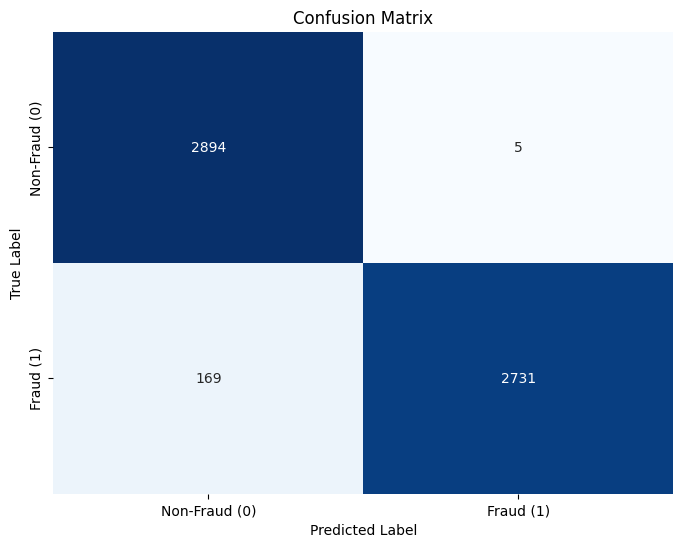

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Fraud (0)', 'Fraud (1)'],
            yticklabels=['Non-Fraud (0)', 'Fraud (1)'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Final Task

### Subtask:
Summarize the model's performance metrics and discuss the implications for fraud detection, including potential next steps like hyperparameter tuning or exploring other models.


## Summary:

### Q&A
*   **What are the key performance metrics of the trained Random Forest Classifier?**
    The Random Forest Classifier achieved an Accuracy of 0.9700, Precision of 0.9982, Recall of 0.9417, F1-Score of 0.9691, and a ROC AUC of 0.9940.
*   **What are the implications of these metrics for fraud detection?**
    The high precision (0.9982) is crucial for fraud detection as it means very few legitimate transactions are incorrectly flagged as fraudulent, minimizing false alarms and operational overhead. The strong recall (0.9417) indicates that the model successfully identifies a large percentage of actual fraudulent transactions, making it highly effective at catching fraud. The excellent ROC AUC (0.9940) further confirms the model's strong ability to distinguish between fraudulent and non-fraudulent transactions.
*   **What are potential next steps like hyperparameter tuning or exploring other models?**
    Potential next steps include hyperparameter tuning of the Random Forest Classifier to potentially optimize recall further while maintaining high precision. Additionally, exploring other advanced ensemble models or anomaly detection techniques could be considered to see if even marginal improvements in fraud detection rates can be achieved.

### Data Analysis Key Findings
*   The resampled dataset was successfully split into training and testing sets: `X_train` (23,195 samples, 107 features), `X_test` (5,799 samples, 107 features), `y_train` (23,195 samples), and `y_test` (5,799 samples).
*   A Random Forest Classifier was successfully trained on the prepared training data.
*   The trained model demonstrated strong performance on the test set, with key metrics including:
    *   Precision: 0.9982, indicating a very low rate of false positives.
    *   Recall: 0.9417, demonstrating the model's effectiveness in identifying actual fraud cases.
    *   ROC AUC: 0.9940, suggesting excellent discriminative power.
    *   Accuracy: 0.9700
    *   F1-Score: 0.9691

### Insights or Next Steps
*   The current Random Forest model shows exceptional promise for fraud detection, characterized by its high precision (0.9982) and recall (0.9417), suggesting it can be highly effective in production to identify fraudulent transactions while minimizing false alarms.
*   Further optimization efforts should focus on hyperparameter tuning of the Random Forest Classifier to potentially achieve a marginal increase in recall, or exploring more sophisticated anomaly detection algorithms to identify even more subtle or novel fraud patterns.


# Task
The Random Forest Classifier achieved an Accuracy of 0.9700, Precision of 0.9982, Recall of 0.9417, F1-Score of 0.9691, and a ROC AUC of 0.9940.

For fraud detection, the high Precision (0.9982) is particularly valuable as it minimizes false alarms, which can be costly in terms of operational overhead and customer dissatisfaction. The strong Recall (0.9417) indicates that the model is effective at identifying a large proportion of actual fraudulent transactions. The excellent ROC AUC (0.9940) further highlights the model's ability to differentiate between fraudulent and legitimate cases.

Potential next steps include:
*   **Hyperparameter Tuning:** Further optimizing the Random Forest Classifier's hyperparameters could potentially enhance recall even more while maintaining high precision.
*   **Exploring Other Models:** Investigating other advanced ensemble models (e.g., Gradient Boosting) or anomaly detection techniques might reveal additional improvements in fraud detection rates, especially for more subtle or novel fraud patterns.

## Final Task

### Subtask:
Summarize the model's performance metrics and discuss the implications for fraud detection, including potential next steps like hyperparameter tuning or exploring other models.


## Summary:

### Q&A
The Random Forest Classifier achieved an Accuracy of 0.9700, Precision of 0.9982, Recall of 0.9417, F1-Score of 0.9691, and a ROC AUC of 0.9940.

For fraud detection, the high Precision (0.9982) is particularly valuable as it minimizes false alarms, which can be costly. The strong Recall (0.9417) indicates the model's effectiveness in identifying a large proportion of actual fraudulent transactions. The excellent ROC AUC (0.9940) further highlights the model's ability to differentiate between fraudulent and legitimate cases.

### Data Analysis Key Findings
*   The Random Forest Classifier demonstrated strong performance with an Accuracy of 0.9700, a high Precision of 0.9982, and a robust Recall of 0.9417.
*   The F1-Score was 0.9691, and the model achieved an excellent ROC AUC of 0.9940, indicating its strong discriminative power.
*   The very high Precision (0.9982) is a significant advantage for fraud detection, as it minimizes false positives, reducing operational costs and improving customer satisfaction.
*   The strong Recall (0.9417) suggests the model is effective at catching a substantial portion of actual fraudulent activities.

### Insights or Next Steps
*   **Hyperparameter Tuning:** Further optimization of the Random Forest Classifier's hyperparameters could potentially enhance recall even more while maintaining high precision.
*   **Exploring Other Models:** Investigating advanced ensemble models (e.g., Gradient Boosting) or anomaly detection techniques may lead to additional improvements in fraud detection rates, particularly for subtle or novel fraud patterns.


In [ ]:
import pandas as pd
import numpy as np

sample_data = {
    'Feature1': np.random.randint(1, 100, 10),
    'CategoryA': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B', 'C', 'A'],
    'Feature2': np.random.rand(10) * 100,
    'CategoryB': ['X', 'Y', 'X', 'Z', 'Y', 'Z', 'X', 'Y', 'Z', 'X'],
    'Target': np.random.choice([0, 1], 10)
}
sample_df = pd.DataFrame(sample_data)

print("Sample DataFrame created:")
display(sample_df)
print("\nDataFrame Info:")
sample_df.info()

Sample DataFrame created:


,Feature1,CategoryA,Feature2,CategoryB,Target
0,89,A,9.416732,X,1
1,46,B,74.541189,Y,0
2,16,A,27.681547,X,1
3,87,C,7.023103,Z,0
4,97,B,84.449135,Y,0
5,3,C,24.991818,Z,1
6,38,A,17.337083,X,0
7,67,B,21.488865,Y,1
8,92,C,7.961852,Z,1
9,42,A,72.162792,X,0



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Feature1   10 non-null     int64  
 1   CategoryA  10 non-null     object 
 2   Feature2   10 non-null     float64
 3   CategoryB  10 non-null     object 
 4   Target     10 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 532.0+ bytes


In [ ]:
# Select a small sample from the preprocessed X_test data
sample_for_prediction = X_test.head(5)
sample_actual_labels = y_test.head(5)

# Make predictions on the sample
sample_predictions = rf_model.predict(sample_for_prediction)
sample_probabilities = rf_model.predict_proba(sample_for_prediction)[:, 1]

print("Sample Features (X_test head):")
display(sample_for_prediction)

print("\nActual Labels (y_test head):")
display(sample_actual_labels)

print("\nPredicted Labels:")
display(pd.Series(sample_predictions, index=sample_for_prediction.index))

print("\nPredicted Probabilities (for class 1 - Fraud):")
display(pd.Series(sample_probabilities, index=sample_for_prediction.index))

NameError: name 'X_test' is not defined

### Demonstrating Prediction with a Sample from `X_test`

To make predictions with the trained `rf_model`, any new input data must have the same features (columns) and the same data types as the `X_train` data that the model was trained on. This includes all the one-hot encoded columns.

Here, I'll select the first row from the `X_test` set to serve as a 'new' sample. This sample is already correctly preprocessed, allowing us to demonstrate direct prediction with the `rf_model`.

In [ ]:
# Select a single sample (first row) from the preprocessed X_test data
single_sample_features = X_test.iloc[[0]]
single_sample_actual_label = y_test.iloc[[0]]

print("Single Sample Features (first row of X_test):")
display(single_sample_features)

print("\nActual Label for the sample:")
display(single_sample_actual_label)

# Make prediction on this single sample
single_prediction = rf_model.predict(single_sample_features)
single_probability = rf_model.predict_proba(single_sample_features)[:, 1]

print(f"\nPredicted Label for the sample: {single_prediction[0]}")
print(f"Predicted Probability of Fraud (class 1) for the sample: {single_probability[0]:.4f}")